# References: 
* https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/
* https://pub.towardsai.net/building-a-recurrent-neural-network-from-scratch-in-python-3ad244b1054f
* https://pub.towardsai.net/building-a-lstm-from-scratch-in-python-1dedd89de8fe
* https://www.d2l.ai/chapter_recurrent-neural-networks/rnn-scratch.html

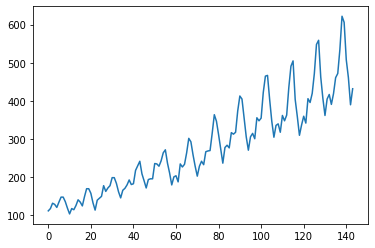

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np
df = pd.read_csv('airline-passengers.csv')
timeseries = df[['Passengers']].values.astype('float32')
plt.plot(timeseries)

In [3]:
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]
print('train-size = {}, test-sixe = {}'.format(train.shape, test.shape))

train-size = (96, 1), test-sixe = (48, 1)


# create the dataset

In [47]:
import torch

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [48]:
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print('train size = ', X_train.shape, y_train.shape)
print('test size = ', X_test.shape, y_test.shape)

train size =  torch.Size([95, 1, 1]) torch.Size([95, 1, 1])
test size =  torch.Size([47, 1, 1]) torch.Size([47, 1, 1])


# Define the model

In [51]:
...
import torch.nn as nn

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

# Training

In [ ]:
import torch.optim as optim
import torch.utils.data as data
 
model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)
n_epochs = 10000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        # print('X_batch size = {}, y_batch size = {}'.format(X_batch.size(), y_batch.size()))
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
        print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))



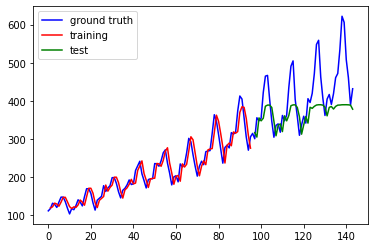

In [102]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries, c='b', label = 'ground truth')
plt.plot(train_plot, c='r', label = 'training')
plt.plot(test_plot, c='g', label = 'test')
plt.legend()
plt.show()

In [94]:
input_size = 10
hidden_size = 20
L = 5
N = 1
n_layers = 1
batch_first = True
h0 = torch.randn(n_layers, N, hidden_size)
c0 = torch.randn(n_layers, N, hidden_size)

if batch_first==False:
    input = torch.randn(L, N, input_size)
else:
    input = torch.randn(N, L, input_size)

# (L,N,H_in) if batch first==False or (N,L,H_in) for batch first==True 
rnn = nn.LSTM(input_size, hidden_size, n_layers, batch_first=batch_first)
print('batch first = ', rnn.batch_first)

output, (hn, cn) = rnn(input, (h0, c0))

batch first =  True


In [98]:
print('num of layers = ', rnn.num_layers)
print('input size = ', rnn.input_size)
print('hidden size = ', rnn.hidden_size)
print('output size = ', output.size())

num of layers =  1
input size =  10
hidden size =  20
output size =  torch.Size([1, 5, 20])


In [99]:
print(input.size())# (L, N, input_size=#features)
input[0][0]

torch.Size([1, 5, 10])


tensor([-0.6162,  0.7084, -0.6053, -0.2278,  0.3183,  2.6558,  0.5549,  0.0469,
        -0.6993,  0.1188])

In [106]:
import torch
a = torch.zeros((1, 16))
a[0, 0] = 1
a[0, 5] = 1
a[0, 10] = 1
a[0, 15] = 1

a.view(4, -1)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [2]:
import torch
torch.cuda.is_available()


False